<a href="https://colab.research.google.com/github/PragadeshBS/EmotionDetection/blob/main/EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
data_dir = 'drive/MyDrive/Datasets/newSimok' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 500 files belonging to 2 classes.


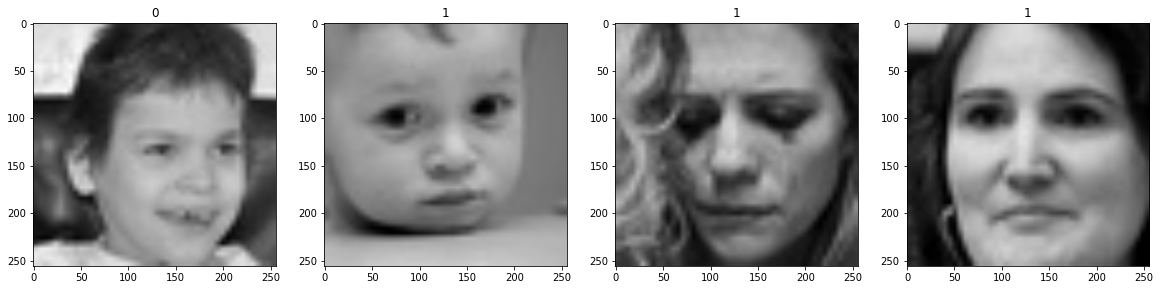

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          [0.21176471, 0.21176471, 0.21176471],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.36078432, 0.36078432, 0.36078432],
          [0.36078

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
train_size

11

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 16)      

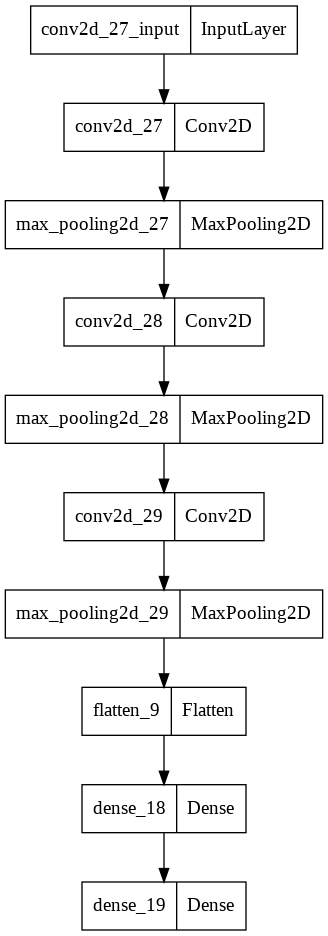

In [ ]:
plot_model(model)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
11/11 [==============================] - 23s 2s/step - loss: 1.8164 - accuracy: 0.4744 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
11/11 [==============================] - 26s 2s/step - loss: 0.6988 - accuracy: 0.5256 - val_loss: 0.6851 - val_accuracy: 0.5729
Epoch 3/15
11/11 [==============================] - 22s 2s/step - loss: 0.6927 - accuracy: 0.5398 - val_loss: 0.6892 - val_accuracy: 0.6146
Epoch 4/15
11/11 [==============================] - 22s 2s/step - loss: 0.6881 - accuracy: 0.5540 - val_loss: 0.6828 - val_accuracy: 0.6562
Epoch 5/15
11/11 [==============================] - 22s 2s/step - loss: 0.6702 - accuracy: 0.6250 - val_loss: 0.6390 - val_accuracy: 0.6042
Epoch 6/15
11/11 [==============================] - 22s 2s/step - loss: 0.6287 - accuracy: 0.6506 - val_loss: 0.5834 - val_accuracy: 0.7083
Epoch 7/15
11/11 [==============================] - 22s 2s/step - loss: 0.5839 - accuracy: 0.6903 - val_loss: 0.5975 - val_accuracy: 0.6875
Epoch 8/15
11/11 [==

In [ ]:
model.evaluate(test)

1/1 [==============================] - 2s 2s/step - loss: 0.3069 - accuracy: 0.9062


[0.3069269061088562, 0.90625]

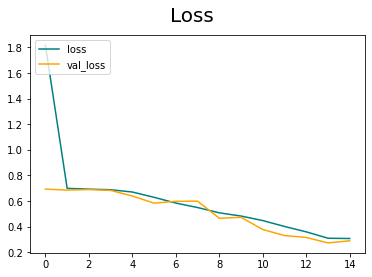

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

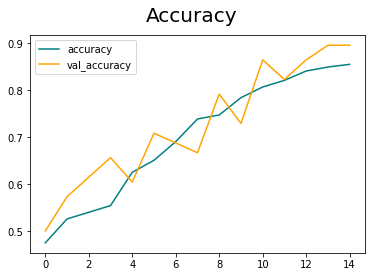

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()